Rochester Delivers to Syracuse
Hartfard Delivers to Albany
Thinking of creating hubs in Syracuse and Albany

Summary: 

Stats
Hartford had this many cars come out of it
         Rochester had this many
        Percent of Purchases Completed?
        Top 10 From each hub
                It's about an hour and a half drive between both current hubs and new locations. 
        Syracuse is close to Utica, Auburn, etc. Figure out actual distances based on zip codes, in terms of time
        Put it on a map, circle main locations
        
Main things to consider
    Amount of time to deliver vs employee ratio, how that effects costs, but also how costs increase with new market hub.
        
Description
        Hub employees can only deliver one car at a time, so keep track of daily deliveries, employees at each location

        
        

In [78]:
import numpy as np
import pandas as pd
import pgeocode
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
xls = pd.ExcelFile('data.xlsx')
df1 = pd.read_excel(xls, 'Sales')
df2 = pd.read_excel(xls, 'Delivery Date')
df3 = pd.read_excel(xls, 'Delivery Geo')

In [17]:
df2 = df2.rename(columns={"SalesSK": "SaleSK"})
df = df1.merge(df2, on = ["SaleSK"])
df = df.merge(df3, on = ["SaleSK"])
df = df.drop(columns = ["DeliveryTypeKey"])
df = df.drop(columns = "SaleID_y")

In [46]:
time = df[["SaleEffectiveDate", "Market Hub Name", "SaleSK"]].groupby(["SaleEffectiveDate", "Market Hub Name"]).agg("count")
time = time.reset_index()

[Text(0, 0.5, 'Daily Sales'),
 [],
 Text(0.5, 0, 'August 1 - September 22'),
 Text(0.5, 1.0, 'Sales by Market Hub Over Time')]

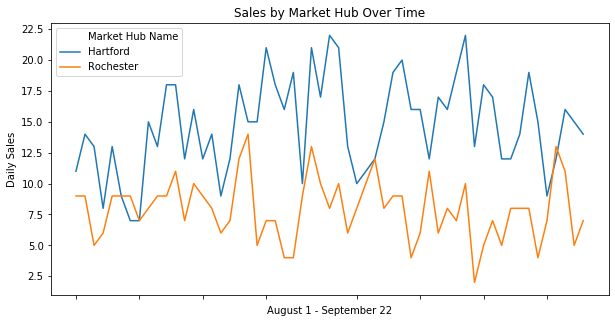

In [70]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=time, x="SaleEffectiveDate", y="SaleSK", hue = "Market Hub Name").set(title='Sales by Market Hub Over Time', xticklabels=[], xlabel="August 1 - September 22", ylabel="Daily Sales")

In [39]:
df["Market Hub Name"].value_counts()

Hartford     838
Rochester    454
Name: Market Hub Name, dtype: int64

In [74]:
df[df["Market Hub Name"] == "Hartford"]["Customer Address MSA"].value_counts()

Hartford-West Hartford-East Hartford, CT    248
Albany-Schenectady-Troy, NY                 162
Springfield, MA                             114
New Haven-Milford, CT                        92
Norwich-New London, CT                       77
Worcester, MA-CT                             56
Torrington, CT                               39
Pittsfield, MA                               24
Greenfield Town, MA                          17
Glens Falls, NY                               7
CARVANA: Westchester, NY                      1
Hudson, NY                                    1
Name: Customer Address MSA, dtype: int64

In [75]:
df[df["Market Hub Name"] == "Rochester"]["Customer Address MSA"].value_counts()

Rochester, NY                            142
Buffalo-Cheektowaga-Niagara Falls, NY    117
Syracuse, NY                              96
Utica-Rome, NY                            21
Ithaca, NY                                18
Corning, NY                               13
Auburn, NY                                 9
Olean, NY                                  9
Elmira, NY                                 8
Batavia, NY                                4
Seneca Falls, NY                           2
Binghamton, NY                             2
Cortland, NY                               2
Jamestown-Dunkirk-Fredonia, NY             2
Name: Customer Address MSA, dtype: int64

We send 162 to Albany which is xx percent, 96 to Syracuse which is xx percent. 

In [101]:
df

,SaleSK,SaleID_x,IsPurchaseCompleted,SaleEffectiveDate,Customer Address Zip,Customer Address MSA,HubLocationID,Market Hub Name
0,594601,1985874,1,2020-08-01,06410,"New Haven-Milford, CT",62,Hartford
1,594604,1987437,1,2020-08-01,14224,"Buffalo-Cheektowaga-Niagara Falls, NY",90,Rochester
2,594631,1994820,1,2020-08-01,13057,"Syracuse, NY",90,Rochester
3,594647,1997801,1,2020-08-01,06112,"Hartford-West Hartford-East Hartford, CT",62,Hartford
4,594652,1998541,1,2020-08-01,06096,"Hartford-West Hartford-East Hartford, CT",62,Hartford
...,...,...,...,...,...,...,...,...
1287,640531,2178598,1,2020-09-26,06518,"New Haven-Milford, CT",62,Hartford
1288,640637,2177371,1,2020-09-26,06702,"New Haven-Milford, CT",62,Hartford
1289,640690,2172480,1,2020-09-26,01001,"Springfield, MA",62,Hartford
1290,640713,2177153,1,2020-09-26,06492,"New Haven-Milford, CT",62,Hartford


In [106]:
#Create ZipCode for MarketHub
def HubZip(row):
    if row == "Hartford":
        return "06101"
    else:
        return "14601"
df["HubZip"] = df["Market Hub Name"].apply(HubZip)

In [96]:
#change all zip codes to 5 digits with leading zeros
def five(num):
    x = str(num).zfill(5)
    return x
df["Customer Address Zip"] = df["Customer Address Zip"].apply(five)

In [107]:
df

,SaleSK,SaleID_x,IsPurchaseCompleted,SaleEffectiveDate,Customer Address Zip,Customer Address MSA,HubLocationID,Market Hub Name,HubZip
0,594601,1985874,1,2020-08-01,06410,"New Haven-Milford, CT",62,Hartford,06101
1,594604,1987437,1,2020-08-01,14224,"Buffalo-Cheektowaga-Niagara Falls, NY",90,Rochester,14601
2,594631,1994820,1,2020-08-01,13057,"Syracuse, NY",90,Rochester,14601
3,594647,1997801,1,2020-08-01,06112,"Hartford-West Hartford-East Hartford, CT",62,Hartford,06101
4,594652,1998541,1,2020-08-01,06096,"Hartford-West Hartford-East Hartford, CT",62,Hartford,06101
...,...,...,...,...,...,...,...,...,...
1287,640531,2178598,1,2020-09-26,06518,"New Haven-Milford, CT",62,Hartford,06101
1288,640637,2177371,1,2020-09-26,06702,"New Haven-Milford, CT",62,Hartford,06101
1289,640690,2172480,1,2020-09-26,01001,"Springfield, MA",62,Hartford,06101
1290,640713,2177153,1,2020-09-26,06492,"New Haven-Milford, CT",62,Hartford,06101


In [83]:
dist = pgeocode.GeoDistance('us')
dist.query_postal_code("14602", "13057")

134.1435335899651

In [112]:
nomi = pgeocode.Nominatim('us')
nomi.query_postal_code("06112")

postal_code             06112
country_code               US
place_name           Hartford
state_name        Connecticut
state_code                 CT
county_name          Hartford
county_code                 3
community_name            NaN
community_code            NaN
latitude              41.7905
longitude            -72.6964
accuracy                    4
Name: 0, dtype: object

In [114]:
df["IsPurchaseCompleted"].value_counts()

1    1195
0      97
Name: IsPurchaseCompleted, dtype: int64

then use google map api for time